## one

In [74]:
import time

# past_fib = {}
def fibonacci_dp(n, past_fib):
    if n in past_fib:
        return past_fib[n]
    if n == 0 or n == 1:
        past_fib[n] = 1
        return 1
    total = fibonacci_dp(n-1, past_fib) + fibonacci_dp(n-2, past_fib)
    past_fib[n] = total
    return total

def fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

def compare(num_range):
    fib_normal = []
    fib_dp = []
    for n in range(1, num_range + 1):
        start = time.process_time()
        fibonacci(n)
        fib_normal.append(time.process_time() - start)
        start = time.process_time()
        past_fib = {}  # reset the dict
        fibonacci_dp(n, past_fib)
        fib_dp.append(time.process_time() - start)
    return list(range(1, num_range + 1)), fib_normal, fib_dp
    
X, fib_normal, fib_dp = compare(30)
# print(fibonacci(1))
# print(fibonacci(30))
# print(fibonacci(0))
# %timeit (fibonacci(30))

Text(0.5, 0, 'number')

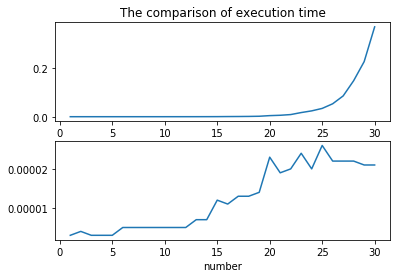

In [75]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
plt.title('The comparison of execution time')
plt.plot(X, fib_normal)
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(X, fib_dp)
plt.xlabel('number')


## two

In [16]:
import sys

graph = {0: {1:2, 4:4},
         1: {2:3},
         2: {3:5, 4:1},
         3: {0:8},
         4: {3:3}}

def allPairsShortestPath(g):
    dist = {}
    pred = {}
    for u in g:
        dist[u] = {}
        pred[u] = {}
        for v in g:
            dist[u][v] = sys.maxsize
            pred[u][v] = None
        dist[u][u] = 0
        pred[u][u] = None
        for v in g[u]:
            dist[u][v] = g[u][v]
            pred[u][v] = u
    for mid in g:
        for u in g:
            for v in g:
                newlen = dist[u][mid] + dist[mid][v]
                if newlen < dist[u][v]:
                    dist[u][v] = newlen
                    pred[u][v] = pred[mid][v]
    return dist, pred

def constructShortestPath(s, t, pred):
    path = [t]
    while t != s:
        t = pred[s][t]
        if t is None:
            return None
        path.insert(0,t)
    return path

dist, pred = allPairsShortestPath(graph)

In [17]:
dist

{0: {0: 0, 1: 2, 2: 5, 3: 7, 4: 4},
 1: {0: 15, 1: 0, 2: 3, 3: 7, 4: 4},
 2: {0: 12, 1: 14, 2: 0, 3: 4, 4: 1},
 3: {0: 8, 1: 10, 2: 13, 3: 0, 4: 12},
 4: {0: 11, 1: 13, 2: 16, 3: 3, 4: 0}}

In [14]:
constructShortestPath(1,0,pred)

[1, 2, 4, 3, 0]

* Construct a network of 100 nodes with a connection density of 30%, the probability of connections being uniform and the cost of any link is constant set at 1.0

In [46]:
import networkx as nx

nodes = 100
density = 0.4
edges = int(((nodes * (nodes - 1))) * density)
g = nx.gnm_random_graph(nodes, edges, seed=0, directed=True)
print(edges)

3960


In [47]:
g_dict = nx.to_dict_of_dicts(g)

for i in g_dict.values():
    for neighbor in i.keys():
        i[neighbor] = 1
        
distances = allPairsShortestPath(g_dict)[0]

In [48]:
print(len(g_dict))
print(g_dict[0])

100
{78: 1, 76: 1, 4: 1, 86: 1, 26: 1, 27: 1, 46: 1, 37: 1, 64: 1, 18: 1, 8: 1, 87: 1, 74: 1, 30: 1, 70: 1, 10: 1, 6: 1, 94: 1, 53: 1, 13: 1, 3: 1, 38: 1, 84: 1, 57: 1, 77: 1, 39: 1, 5: 1, 82: 1, 90: 1, 25: 1, 99: 1, 60: 1, 83: 1}


In [49]:
d_set = []
for i in distances.values():
    for k, v in i.items():
        d_set.append(v)
print(len(d_set))

10000


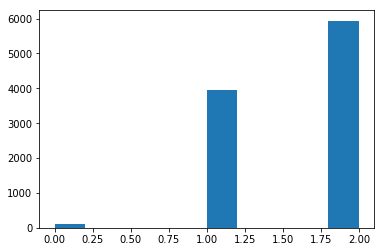

In [50]:
import matplotlib.pyplot as plt

plt.hist(d_set)
plt.show()

### 3

In [1]:
import gym
import numpy as np

env_name = "MountainCar-v0"
env = gym.make(env_name)

obs = env.reset()
# env.render()

n_states = 40
episodes = 1000
initial_lr = 1.0
min_lr = 0.005
gamma = 0.99
max_steps = 5000
# epsilon = 0.05
epsilon = 0.05  # prevent the agent from going left forever

env = env.unwrapped
env.seed()
np.random.seed(0)

def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    return pos_scaled, vel_scaled

q_table = np.zeros((n_states, n_states, env.action_space.n))
total_steps = 0

for episode in range(episodes):
#     print("Episode:", episode)
    obs = env.reset()
    total_reward = 0
    action_hist = []  # added
    alpha = max(min_lr, initial_lr*(gamma**(episode//100)))
    steps = 0
    for i in range(max_steps):
        # env.render()
        pos, vel = discretization(env, obs)
        if np.random.uniform(low=0, high=1) < epsilon:
            # exploration
            a = np.random.choice(env.action_space.n)
        else:
            # exploitation
            a = np.argmax(q_table[pos][vel])
        obs, reward, terminate, _ = env.step(a)
        total_reward += abs(obs[0]+0.5)
        pos_, vel_ = discretization(env, obs)
        q_table[pos][vel][a] = (1 - alpha) * q_table[pos][vel][a] + alpha * (reward + gamma * np.max(q_table[pos_][vel_]))
        steps += 1
        if terminate:
#             print('terminate')
            break
    if episode % 50 == 0:
        print('Episode: %s, Total reward: %s' % (episode, total_reward))

Episode: 0, Total reward: 1398.2269593629644
Episode: 50, Total reward: 111.04775300886155
Episode: 100, Total reward: 266.79627759513187
Episode: 150, Total reward: 245.71158893139
Episode: 200, Total reward: 177.14937969120442
Episode: 250, Total reward: 177.84899640725658
Episode: 300, Total reward: 109.84362797160367
Episode: 350, Total reward: 95.8866154332364
Episode: 400, Total reward: 140.0906742828685
Episode: 450, Total reward: 166.1751823858563
Episode: 500, Total reward: 315.8359837273943
Episode: 550, Total reward: 390.8405784142965
Episode: 600, Total reward: 145.8358466424494
Episode: 650, Total reward: 115.19091361530819
Episode: 700, Total reward: 311.02924263074004
Episode: 750, Total reward: 103.01968367664355
Episode: 800, Total reward: 117.33169251996122
Episode: 850, Total reward: 104.23998390083999
Episode: 900, Total reward: 112.21901892830178
Episode: 950, Total reward: 93.10506483386298


In [2]:
solution_policy = np.argmax(q_table, axis=2)

obs = env.reset()
while True:
    env.render()
    pos, vel = discretization(env, obs)
    a = solution_policy[pos][vel]
    obs, reward, terminate,_ = env.step(a)
    if terminate:
        break